###6) Consider a causal LTI system described by the following transfer function,$H(z) = \frac{\frac{1}{6}+\frac{1}{2}z^{-1}+\frac{1}{2}z^{-2}+\frac{1}{6}z^{-3}}{1+\frac{1}{3}z^{-2}}$

###(a) Sketch the magnitude response $H(e^{jω})$ (linear scale, not dB) from the z-transform. What type of filter is H(z)$?$

$H(z) = \frac{\frac{1}{6}+\frac{1}{2}z^{-1}+\frac{1}{2}z^{-2}+\frac{1}{6}z^{-3}}{1+\frac{1}{3}z^{-2}} = \frac{1}{6}(\frac{z^{3}+3z^{2}+3z+1}{z(z^{2}+1)}) = \frac{1}{6}(\frac{(z-z_1)(z-z_2)(z-z_3)}{(z-p_1)(z-p_2)(z-p_3)})$
<br> $H(e^{jw}) = \frac{1}{6}(\frac{(e^{jw}-z_1)(e^{jw}-z_2)(e^{jw}-z_3)}{(e^{jw}-p_1)(e^{jw}-p_2)(e^{jw}-p_3)})$
<br>Therefore,
$|H(e^{jw})| = \frac{1}{6}|(\frac{(e^{jw}-z_1)(e^{jw}-z_2)(e^{jw}-z_3)}{(e^{jw}-p_1)(e^{jw}-p_2)(e^{jw}-p_3)}) |=\frac{1}{6}(\frac{\text{distance of zeros from unit circle}}{\text{distance of poles from unit circle}})$ 

Zeros of given H(z): 
[(-0.9999967152408714+5.689374167928025e-06j), (-0.9999967152408714-5.689374167928025e-06j), (-1.000006569518257+0j)]
Poles of given H(z): 
[(-0+0.5773502691896258j), -0.5773502691896258j, 0j]


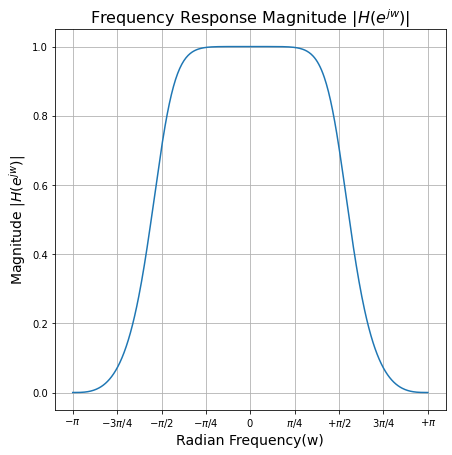

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

b = [1,3,3,1]
a = [1,0,1/3,0]
zeros = list(np.roots(b))  # computes root of numerator polynomial taking coefficients as b i.e we obtain zeros of H(z)
poles = list(np.roots(a))  # computes root of denominator polynomial taking coefficients as a i.e we obtain poles of H(z)
w=np.linspace(-(np.pi),np.pi,512) # defining the frequency axis with 512 points
print("Zeros of given H(z): ")
print(zeros)
print("Poles of given H(z): ")
print(poles)
H =[1]*512  # initializing H(e^jw) to 1 
for k in range(len(zeros)):
  v = (np.exp(1j*w) - zeros[k]) # distance from zeroes
  H = np.multiply(H,v)  # product of distance from zeroes
for k in range(len(poles)): 
  x = np.exp(1j*w) - poles[k]  # distance from poles
  H = np.divide(H,x)   # product of distance from zeroes/product of distance from poles

mag= (1/6)*np.abs(H)

#Plotting the Magnitude Spectrum
figure = plt.figure(figsize=(7,7))

plt.plot(w,mag)
plt.xticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
           [r'$-\pi$', r'$-3\pi/4$', r'$-\pi/2$', r'$-\pi/4$', r'$0$', r'$\pi/4$',r'$+\pi/2$',r'$3\pi/4$', r'$+\pi$'])
plt.xlabel("Radian Frequency(w)", fontsize="14")
plt.ylabel("Magnitude |$H(e^{jw})$|",fontsize="14")
plt.title("Frequency Response Magnitude |$H(e^{jw})$|",fontsize="16")
plt.grid(True)

####Observation of 6a) 
Clearly from the Magnitude spectrum, we can observe that the lower frequencies have a gain of 1 and the gain gradually decreases as the frequency increases.
<br> So it can be concluded that the given system with transfer function
 $H(z) = \frac{\frac{1}{6}+\frac{1}{2}z^{-1}+\frac{1}{2}z^{-2}+\frac{1}{6}z^{-3}}{1+\frac{1}{3}z^{-2}}$
 is a **Low Pass Filter**  as it allows the lower frequencies and attenuates the higher frequencies.

### b)Sketch the pole-zero plot. Is the system stable$?$




In [ ]:
from matplotlib import patches
from matplotlib.pyplot import axvline, axhline
from collections import defaultdict
    

def z_plane(z, p):
    """Plot the complex z-plane given zeros and poles.
    """
    
    # get a figure/plot
    ax = plt.subplot(2, 2, 1)

    # Add unit circle and zero axes    
    unit_circle = patches.Circle((0,0), radius=1, fill=False,color='black', ls='solid', alpha=1)
    ax.add_patch(unit_circle)
    axvline(0, color='0.3')
    axhline(0, color='0.3')
    
    # Plot the poles and set marker properties
    poles = plt.plot(p.real, p.imag, 'x', markersize=11, alpha=1,color='blue')
    
    # Plot the zeros and set marker properties
    zeros = plt.plot(z.real, z.imag,  'o', markersize=11, 
             color='none', alpha=1,
             markeredgecolor=poles[0].get_color())# same color as poles
             

    # Scale axes to fit
    r = 1.5 * np.amax(np.concatenate((abs(z), abs(p), [1]))) 
    plt.axis('scaled')
    plt.axis([-r, r, -r, r])  # scales axis from -1.5 to 1.5

    mark_overlapping_items(list(z))
    mark_overlapping_items(list(p)) 
def mark_overlapping_items(items):
    """
    If there multiples poles/zeroes,plot a superscript on the graph.
    """
    d = defaultdict(int)  # empty dictionary 
    for i in items:
        d[i] += 1
    for item, count in d.items():
        if count > 1:
            plt.text(item.real, item.imag, r' ${}^{' + str(count) + '}$', fontsize=14, color='blue')
            

From 6a) if the obtained zeroes and poles <br>
Zeros of given H(z): <br> 
$z_{1} = \text{ -0.9999967152408714+5.689374167928025e-06j}$
<br> $z_{2}=\text{ -0.9999967152408714-5.689374167928025e-06j}$
<br> $z_{3}= \text{ -1.000006569518257+0j}$
<br>
Poles of given H(z): <br> 
$p_{1} =\text{ 0.5773502691896258j}$
<br> $p_{2}=\text{ -0.5773502691896258j}$
<br> $p_{3}= \text{0}$
<br>
are considered, then the pole-zero plot is given as

Text(0, 0.5, 'Img(z)')

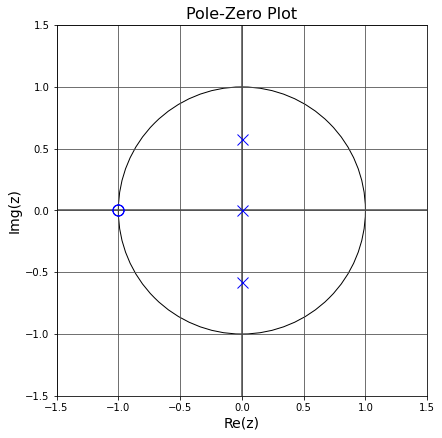

In [ ]:
b = [1,3,3,1]
a = [1,0,1/3,0]
zeros = np.array(np.roots(b))
poles = np.array(np.roots(a))
figure = plt.figure(figsize=(15,15))
z_plane(zeros, poles)
plt.grid(True, color='0.3', linestyle='-', which='both', axis='both')
plt.title('Pole-Zero Plot',fontsize="16")
plt.xlabel("Re(z)",fontsize="14")
plt.ylabel("Img(z)",fontsize="14")

If the zeros are approximated as -1, then the given H(z) has <br>
Zeros: <br> 
$z_{1} =-\text{1}$
<br> $z_{2}=-\text{1}$
<br> $z_{3}= -\text{1}$
<br>
Poles: <br> 
$p_{1} =\text{0.5773502691896258j}$
<br> $p_{2}=-\text{0.5773502691896258j}$
<br> $p_{3}= \text{0}$
<br>
and the pole-zero plot is given as follows:

Text(0, 0.5, 'Img(z)')

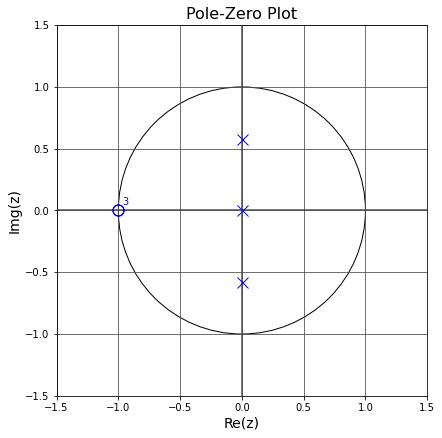

In [ ]:
figure = plt.figure(figsize=(15,15))
zeros = np.array([-1,-1,-1]) # multiple zeroes at -1
poles=np.array([(-0+0.5773502691896258j), -0.5773502691896258j, 0j])
z_plane(zeros, poles)
plt.grid(True, color='0.3', linestyle='-', which='both', axis='both')
plt.title('Pole-Zero Plot',fontsize="16")
plt.xlabel("Re(z)",fontsize="14")
plt.ylabel("Img(z)",fontsize="14")


####Stability:
*   A sytem is said to be **causal** if the ROC is outside the outermost finite 
pole.
*   A system is said to be **stable** if the ROC includes the unit circle $|z|= 1$.
*   A system is said to be **causal and stable** if all poles lie inside the unit circle.

Given the system is causal LTI system. So the system becomes stable if it has all poles with magnitude$<$1  so that they lie inside the unit circle.
<br> From the pole-zero plot, it can be observed that the given system has all its poles lying inside the unit circle $|z|= 1$.
<br>Thus the given system is **stable**.

###Now consider the following length-128 input signal,<br>
###$x[n] = \text{0  for n = 1, . . . , 50 and 1  for n = 51, . . . , 128}$


###(c) Plot the magnitude of $X(e^{jω})$.


$x[n] = \text{0  for n = 1, . . . , 50 and 1  for n = 51, . . . , 128}$ <br>
$X(e^{jω}) = \sum_{n=-\infty}^{\infty}x[n]e^{-jwn}  = \sum_{n=51}^{128}e^{-jwn} = e^{-84.5jw}(\frac{sin(34w)}{sin(0.5w)}) $

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


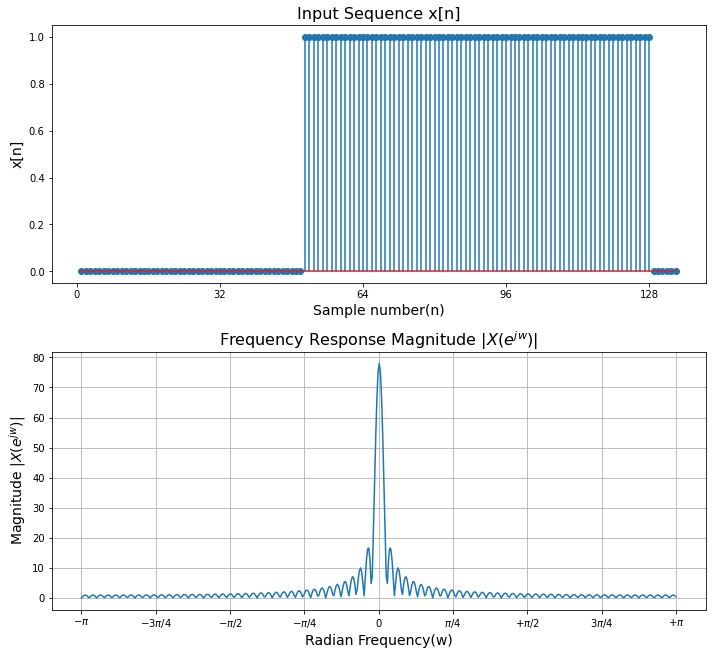

In [ ]:
from scipy.fftpack import fft,fftshift
n = np.arange(1,135,1)
x= []
# Input sequence x[n]
for i in n:
        if i<=50:
            x.append(0)  
        elif i>50 and i<=128:
            x.append(1)
        else:
          x.append(0)
w=np.linspace(-(np.pi),np.pi,512) # defining the frequency axis with 512 points
NFFT=512 #NFFT-point DFT      
X=fftshift(fft(x,NFFT)) #compute DFT using FFT  
#X = np.exp(1j*(-84.5)*w)*np.sin(w*(34))/(np.sin(w*0.5)) # computing dtft by directly using the formula

figure = plt.figure(figsize=(10, 10))

# Plotting Input sequence
plt.subplot(2,1,1)
plt.stem(n,x)
plt.xticks(np.arange(0, 135+0.01, 32))
plt.xlabel('Sample number(n)',fontsize="14")
plt.ylabel('x[n]',fontsize="14")
plt.title("Input Sequence x[n]",fontsize="16")

# Plotting Magnitude Spectrum of Input sequence
plt.subplot(2,1,2)
plt.plot(w,np.abs(X))
plt.xticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
           [r'$-\pi$', r'$-3\pi/4$', r'$-\pi/2$', r'$-\pi/4$', r'$0$', r'$\pi/4$',r'$+\pi/2$',r'$3\pi/4$', r'$+\pi$'])
plt.xlabel('Radian Frequency(w)',fontsize="14")
plt.ylabel('Magnitude |$X(e^{jw})$|',fontsize="14")
plt.title("Frequency Response Magnitude |$X(e^{jw})$|",fontsize="16")
plt.grid(True)

figure.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

###d)We want to filter x[n] with H(z) to obtain y[n]. Compute and plot y[n] using the Matlab function filter. Plot the magnitude of $Y(e^{jω})$. Can you think of other ways of realizing this filtering operation ?

####(i). Plotting x[n], h[n], y[n]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performanc

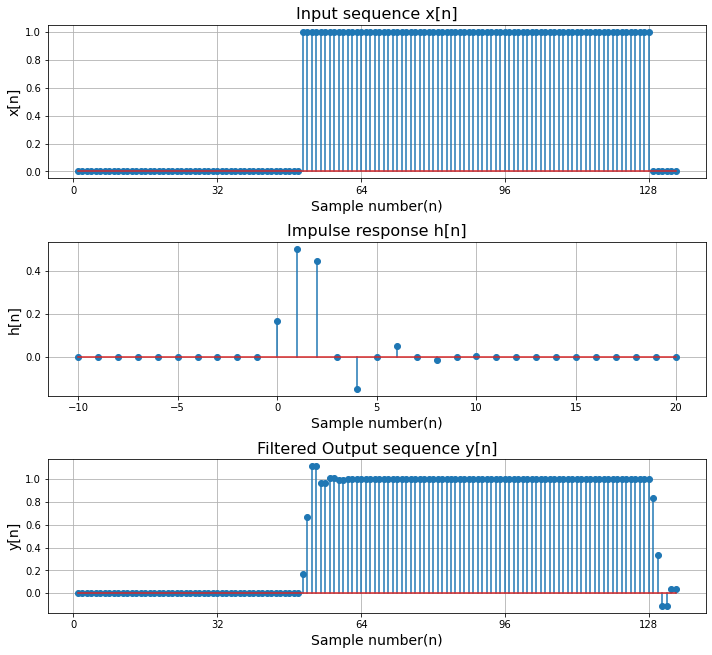

In [ ]:
from scipy.signal import lfilter
n=np.arange(1,135,1)  # time coefficients for x[n]
n1=np.arange(-10,21,1) # time coefficients for h[n]
b = [1,3,3,1]      # filter coefficients
a = [1,0,1/3,0]
u=1*(n1==0)  # impulse function δ[n]
h = 1/6*lfilter(b, a, u) # impulse response h[n]
y = 1/6*lfilter(b, a, x) # computing y[n]=x[n]*h[n]

#Plotting the sequences
figure = plt.figure(figsize=(10, 10))

# Plotting Input sequence
plt.subplot(3,1,1)
plt.stem(n,x)
plt.xticks(np.arange(0, 135+0.01, 32))
plt.xlabel('Sample number(n)',fontsize="14")
plt.ylabel('x[n]',fontsize="14")
plt.title("Input sequence x[n]",fontsize="16")
plt.grid(True)

# Plotting Impulse Response
plt.subplot(3,1,2)
plt.stem(n1,h)
plt.xticks(np.arange(-10,21,5))
plt.xlabel('Sample number(n)',fontsize="14")
plt.ylabel('h[n]',fontsize="14")
plt.title("Impulse response h[n]",fontsize="16")
plt.grid(True)

# Plotting Output sequence
plt.subplot(3,1,3)
plt.stem(n,y)
plt.xticks(np.arange(0, 135+0.01, 32))
plt.xlabel('Sample number(n)',fontsize="14")
plt.ylabel('y[n]',fontsize="14")
plt.title("Filtered Output sequence y[n]",fontsize="16")
plt.grid(True)

figure.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

####(ii). Plotting magnitude spectrum |$X(e^{jw})$|, |$H(e^{jw})$|, |$Y(e^{jw})$|

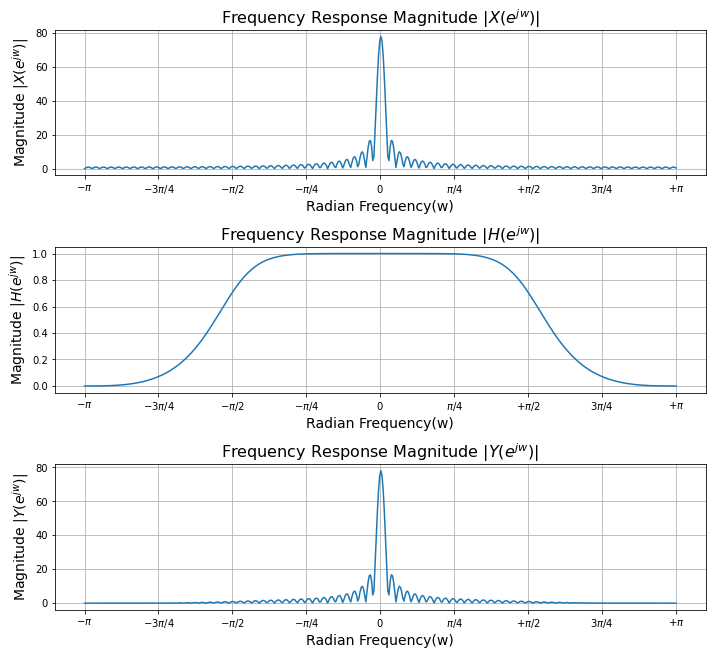

In [ ]:
w=np.linspace(-(np.pi),np.pi,512) # defining the frequency axis with 512 points
NFFT=512 
Y=fftshift(fft(y,NFFT))  

## Plotting Magnitude spectrum
figure = plt.figure(figsize=(10,10))

## Plotting Input Magnitude spectrum
plt.subplot(3,1,1)
plt.plot(w,np.abs(X))
plt.xticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
           [r'$-\pi$', r'$-3\pi/4$', r'$-\pi/2$', r'$-\pi/4$', r'$0$', r'$\pi/4$',r'$+\pi/2$',r'$3\pi/4$', r'$+\pi$'])
plt.xlabel('Radian Frequency(w)',fontsize="14")
plt.ylabel('Magnitude |$X(e^{jw})$|',fontsize="14")
plt.title("Frequency Response Magnitude |$X(e^{jw})$|",fontsize="16")
plt.grid(True)

## Plotting Impulse Response Magnitude spectrum
plt.subplot(3,1,2)
plt.plot(w,(1/6)*np.abs(H))
plt.xticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
           [r'$-\pi$', r'$-3\pi/4$', r'$-\pi/2$', r'$-\pi/4$', r'$0$', r'$\pi/4$',r'$+\pi/2$',r'$3\pi/4$', r'$+\pi$'])
plt.xlabel('Radian Frequency(w)',fontsize="14")
plt.ylabel('Magnitude |$H(e^{jw})$|',fontsize="14")
plt.title("Frequency Response Magnitude |$H(e^{jw})$|",fontsize="16")
plt.grid(True)

## Plotting Output Magnitude spectrum
plt.subplot(3,1,3)
plt.plot(w,np.abs(Y))
plt.xticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
           [r'$-\pi$', r'$-3\pi/4$', r'$-\pi/2$', r'$-\pi/4$', r'$0$', r'$\pi/4$',r'$+\pi/2$',r'$3\pi/4$', r'$+\pi$'])
plt.xlabel('Radian Frequency(w)', fontsize="14")
plt.ylabel('Magnitude |$Y(e^{jw})$|',fontsize="14")
plt.title('Frequency Response Magnitude |$Y(e^{jw})$|',fontsize="16")
plt.grid(True)

figure.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The other ways can be 
<br>
- by finding h[n] from $H(e^{jw})$ using inverse DTFT and then convolving x[n] and h[n] to obtain y[n] without using inbuilt function "scipy.signal.lfilter".Then finding $Y(e^{jw})$ by applying DTFT of y[n].
- Convolution in time domain is equivalent to multiplication in frequency domain according to convolution property. So another method is by multiplying $X(e^{jw})$ and $H(e^{jw})$ to obtain $Y(e^{jw})$ and then finding inverse DTFT of $Y(e^{jw})$ to obtain y[n].


###e) Explain qualitatively the form of y[n].
- The input sequence x[n] is zero upto n=50 sample and suddenly rises to 1 from the next sample i.e from n=51 and again falls sharpenly after n=128 sample. 
- The given system $H(e^{jw})$ is a low-pass filter. So $H(e^{jw})$ allows lower frequencies of $X(e^{jw})$ with a gain of 1 and gradually attenuates the higher frequencies.
- The sharp transitions in a signal indicate high frequency components.
So passing x[n] with sharp transitions to a low-pass filter, removes these components and provides a smooth transition. 
-  As a result, we can clearly see that in y[n] there's a smooth transition of rising edge from n=50 and a smooth transition of falling  edge from n=128 and the sharp transitions in x[n] are filtered out.
- In frequency domain, we can clearly observe that |$Y(e^{jw})$| has fewer sidelobes than |$X(e^{jw})$|. This is because of the low pass filter |$H(e^{jw})$| which attenuates higher frequency components. As a result, |$Y(e^{jw})$| has the  major lobe and few sidelobes and the high frequency components are almost zero.

### 7) Look at the example plot that shows the group delay when a Gaussian pulse is filtered using a rectangular window here https://www.ee.iitb.ac.in/~akumar/courses/ee603-2020/sampling.html#group-delay-and-linear-phase. Now, modify the example in the following way.

###a) Construct an ideal low-pass filter with cut-off $\frac{π}{2}$ and truncate it to keep the middle 201 points (i.e.,take $\frac{sin(\frac{πn}{2})}{πn}$) for n ∈ −100, −99, . . . , 99, 100. Use this to filter a Gaussian pulse. Where is the new peak ? How much is the delay ?


In [ ]:
# Function for constructing sinc pulse i.e low-pass filter in time domain
def low_pass_filter(omega_c,n):
  return omega_c / np.pi * np.sinc(omega_c * n /np.pi)
  
# Function for constructing ideal low-pass filter in frequency domain
def ideal_lpf(omega_c,w):
  H = []
  for i in w:
    if np.abs(i)<=omega_c:
      H.append(1)
    else:
      H.append(0)
  return np.asarray(H)

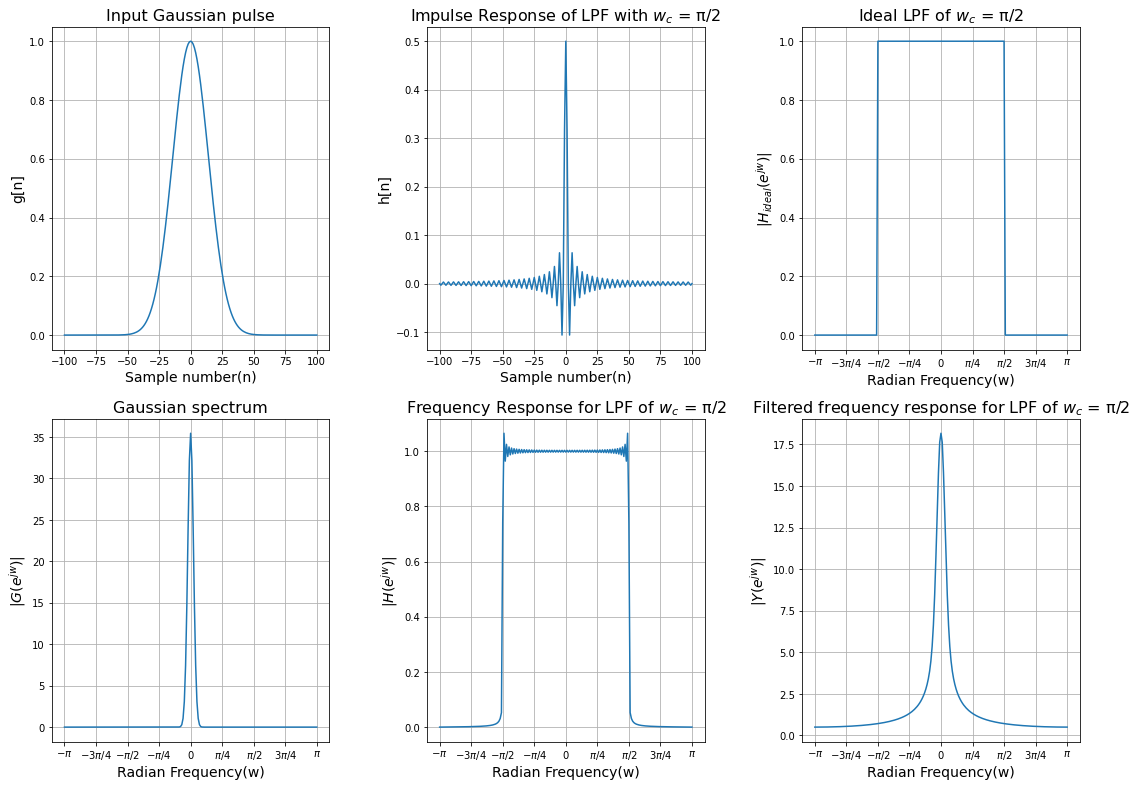

In [ ]:
omega_c1 = np.pi / 2

# Time domain sequences 
n = np.arange(-100, 101,1) 
new_n = np.arange(-200,201,1) # new axis defined for convolved output
g = np.exp(-n**2 / 400) # gaussian pulse
h1 = low_pass_filter(omega_c1,n)
y1 = np.convolve(h1,g)

# Frequency domain responses
NFFT = 201
w=np.linspace(-np.pi,np.pi,201) # defining frequency axis
G = fftshift(fft(g,NFFT))
H1 = fftshift(fft(h1,NFFT)) # approximated low-pass filter
Y1 = fftshift(fft(y1,NFFT))
H_ideal1 = ideal_lpf(omega_c1,w) # ideal low-pass filter
figure = plt.figure(figsize=(16,12))

# Plotting the input Gaussian pulse in time domain
plt.subplot(2,3,1)
plt.plot(n,g)
plt.xlabel('Sample number(n)',fontsize="14")
plt.ylabel('g[n]',fontsize="14")
plt.title("Input Gaussian pulse",fontsize="16")
plt.grid(True)

# Plotting Impulse Response in time domain
plt.subplot(2,3,2)
plt.plot(n,h1)
plt.xlabel('Sample number(n)',fontsize="14")
plt.ylabel('h[n]',fontsize="14")
plt.title("Impulse Response of LPF with $w_{c}$ = π/2",fontsize="16")
plt.grid(True)

# Plotting the Ideal Low-pass filter in frequency domain
plt.subplot(2,3,3)
plt.plot(w,np.abs(H_ideal1))
plt.xticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
           [r'$-\pi$', r'$-3\pi/4$', r'$-\pi/2$', r'$-\pi/4$', r'$0$', r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$', r'$\pi$'])
plt.xlabel('Radian Frequency(w)',fontsize="14")
plt.ylabel('|$H_{ideal}(e^{jw})$|',fontsize="14")
plt.title("Ideal LPF of $w_{c}$ = π/2",fontsize="16")
plt.grid(True)

# Plotting Gaussian spectrum in frequency domain
plt.subplot(2,3,4)
plt.plot(w,np.abs(G))
plt.xticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
           [r'$-\pi$', r'$-3\pi/4$', r'$-\pi/2$', r'$-\pi/4$', r'$0$', r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$', r'$\pi$'])
plt.xlabel('Radian Frequency(w)',fontsize="14")
plt.ylabel('|$G(e^{jw})$|',fontsize="14")
plt.title("Gaussian spectrum",fontsize="16")
plt.grid(True)

# Plotting Practical(truncated) Low-Pass Filter in frequency domain
plt.subplot(2,3,5)
plt.plot(w, np.abs(H1))
plt.xticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
           [r'$-\pi$', r'$-3\pi/4$', r'$-\pi/2$', r'$-\pi/4$', r'$0$', r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$', r'$\pi$'])

plt.xlabel('Radian Frequency(w)',fontsize="14")
plt.ylabel('|$H(e^{jw})$|',fontsize="14")
plt.title("Frequency Response for LPF of $w_{c}$ = π/2",fontsize="16")
plt.grid(True)

# Plotting the Filtered output response in frequency domain
plt.subplot(2,3,6)
plt.plot(w, np.abs(Y1))
plt.xticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
           [r'$-\pi$', r'$-3\pi/4$', r'$-\pi/2$', r'$-\pi/4$', r'$0$', r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$', r'$\pi$'])

plt.xlabel('Radian Frequency(w)',fontsize="14")
plt.ylabel('|$Y(e^{jw})$|',fontsize="14")
plt.title("Filtered frequency response for LPF of $w_{c}$ = π/2",fontsize="16")
plt.grid(True)

figure.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

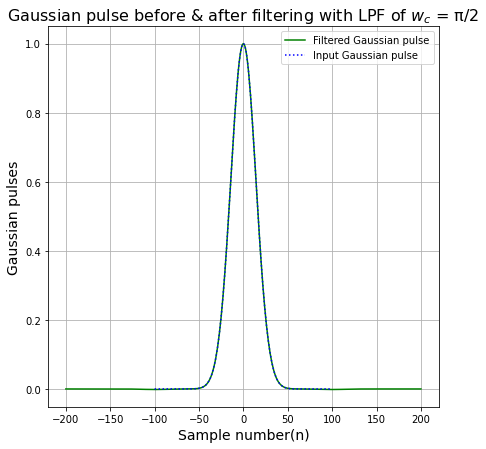

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(new_n,y1,color="green")
plt.plot(n,g,color="blue",linestyle="dotted")
plt.title("Gaussian pulse before & after filtering with LPF of $w_{c}$ = π/2",fontsize="16")
plt.xlabel("Sample number(n)",fontsize="14")
plt.ylabel("Gaussian pulses",fontsize="14")
plt.grid(True)
plt.legend(["Filtered Gaussian pulse","Input Gaussian pulse"])
plt.show()

In [ ]:
peak = -200 + np.where(y1== np.max(y1))[0][0]
print("Filtered Gaussian spectrum with cut-off frequency π/2 has a peak at n = {0}".format(peak))
print("Delay is by n = {} samples".format(peak))

Filtered Gaussian spectrum with cut-off frequency π/2 has a peak at n = 0
Delay is by n = 0 samples


####Observation of 7a):
Clearly , we can observe that both the input and filtered gaussian pulses with LPF of cut-off frequency $w_{c}$ = π/2 overlapped with each other and the peak of input and filtered gaussian pulses are at n=0 sample. So there is no delay in the filtered gaussian pulse.

###b)Repeat for cut-off frequencies $\frac{π}{4}$ and $\frac{3π}{4}$. Where are the peaks ?

####(i) cut-off frequency = $\frac{π}{4}$ 

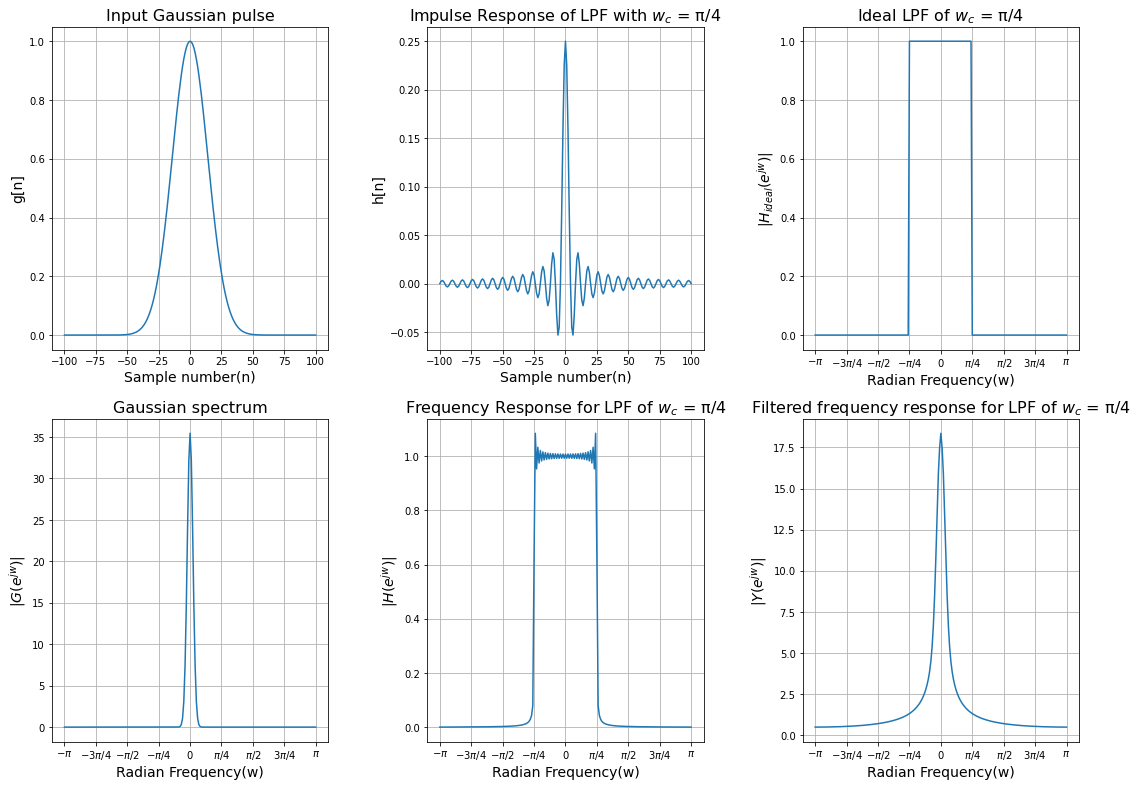

In [ ]:
omega_c2 = np.pi / 4
# Time domain sequences 
h2 = low_pass_filter(omega_c2,n)
y2 = np.convolve(h2,g)

# Frequency domain responses
H2 = fftshift(fft(h2,NFFT)) # approximated low-pass filter
Y2 = fftshift(fft(y2,NFFT))
H_ideal2 = ideal_lpf(omega_c2,w) # ideal low-pass filter
figure = plt.figure(figsize=(16,12))

# Plotting the input Gaussian pulse in time domain
plt.subplot(2,3,1)
plt.plot(n,g)
plt.xlabel('Sample number(n)',fontsize="14")
plt.ylabel('g[n]',fontsize="14")
plt.title("Input Gaussian pulse",fontsize="16")
plt.grid(True)

# Plotting Impulse Response in time domain
plt.subplot(2,3,2)
plt.plot(n,h2)
plt.xlabel('Sample number(n)',fontsize="14")
plt.ylabel('h[n]',fontsize="14")
plt.title("Impulse Response of LPF with $w_{c}$ = π/4",fontsize="16")
plt.grid(True)

# Plotting the Ideal Low-pass filter in frequency domain
plt.subplot(2,3,3)
plt.plot(w,np.abs(H_ideal2))
plt.xticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
           [r'$-\pi$', r'$-3\pi/4$', r'$-\pi/2$', r'$-\pi/4$', r'$0$', r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$', r'$\pi$'])
plt.xlabel('Radian Frequency(w)',fontsize="14")
plt.ylabel('|$H_{ideal}(e^{jw})$|',fontsize="14")
plt.title("Ideal LPF of $w_{c}$ = π/4",fontsize="16")
plt.grid(True)

# Plotting Gaussian spectrum in frequency domain
plt.subplot(2,3,4)
plt.plot(w,np.abs(G))
plt.xticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
           [r'$-\pi$', r'$-3\pi/4$', r'$-\pi/2$', r'$-\pi/4$', r'$0$', r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$', r'$\pi$'])
plt.xlabel('Radian Frequency(w)',fontsize="14")
plt.ylabel('|$G(e^{jw})$|',fontsize="14")
plt.title("Gaussian spectrum",fontsize="16")
plt.grid(True)

# Plotting Practical(truncated) Low-Pass Filter in frequency domain
plt.subplot(2,3,5)
plt.plot(w, np.abs(H2))
plt.xticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
           [r'$-\pi$', r'$-3\pi/4$', r'$-\pi/2$', r'$-\pi/4$', r'$0$', r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$', r'$\pi$'])

plt.xlabel('Radian Frequency(w)',fontsize="14")
plt.ylabel('|$H(e^{jw})$|',fontsize="14")
plt.title("Frequency Response for LPF of $w_{c}$ = π/4",fontsize="16")
plt.grid(True)

# Plotting the Filtered output response in frequency domain
plt.subplot(2,3,6)
plt.plot(w, np.abs(Y2))
plt.xticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
           [r'$-\pi$', r'$-3\pi/4$', r'$-\pi/2$', r'$-\pi/4$', r'$0$', r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$', r'$\pi$'])

plt.xlabel('Radian Frequency(w)',fontsize="14")
plt.ylabel('|$Y(e^{jw})$|',fontsize="14")
plt.title("Filtered frequency response for LPF of $w_{c}$ = π/4",fontsize="16")
plt.grid(True)

figure.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

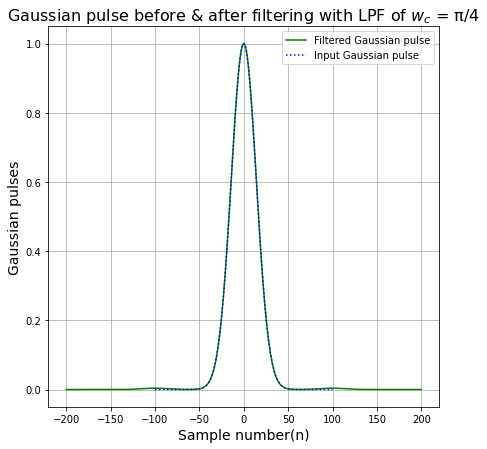

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(new_n,y2,color="green")
plt.plot(n,g,color="blue",linestyle="dotted")
plt.title("Gaussian pulse before & after filtering with LPF of $w_{c}$ = π/4",fontsize="16")
plt.xlabel("Sample number(n)",fontsize="14")
plt.ylabel("Gaussian pulses",fontsize="14")
plt.grid(True)
plt.legend(["Filtered Gaussian pulse","Input Gaussian pulse"])
plt.show()

In [ ]:
peak = -200 + np.where(y2== np.max(y2))[0][0]
print("Filtered Gaussian spectrum with cut-off frequency π/4 has a peak at n = {0}".format(peak))
print("Delay is by n = {} samples".format(peak))

Filtered Gaussian spectrum with cut-off frequency π/4 has a peak at n = 0
Delay is by n = 0 samples


####Observation of 7b):
Clearly , we can observe that both the input and filtered gaussian pulses with LPF of cut-off frequency $w_{c}$ = π/4 overlapped with each other and the peak of input and filtered gaussian pulses are at n=0 sample. So there is no delay in the filtered gaussian pulse.

####(ii) cut-off frequency = $\frac{3π}{4}$ 

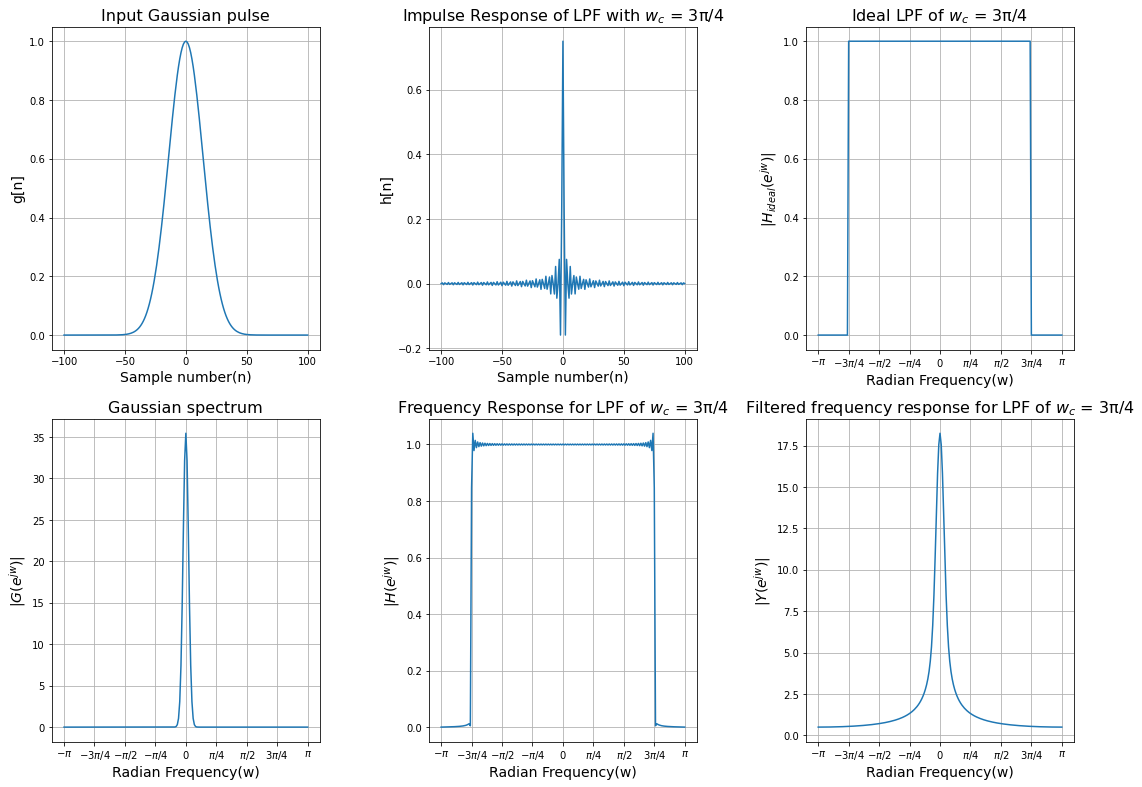

In [ ]:
omega_c3 = 3*np.pi / 4
# Time domain sequences 
h3 = low_pass_filter(omega_c3,n)
y3 = np.convolve(h3,g)

# Frequency domain responses
H3 = fftshift(fft(h3,NFFT)) # approximated low-pass filter
Y3 = fftshift(fft(y3,NFFT))
H_ideal3 = ideal_lpf(omega_c3,w) # ideal low-pass filter
#Plotting 
figure = plt.figure(figsize=(16,12))

# Plotting the input Gaussian pulse in time domain
plt.subplot(2,3,1)
plt.plot(n,g)
plt.xlabel('Sample number(n)',fontsize="14")
plt.ylabel('g[n]',fontsize="14")
plt.title("Input Gaussian pulse",fontsize="16")
plt.grid(True)

# Plotting Impulse Response in time domain
plt.subplot(2,3,2)
plt.plot(n,h3)
plt.xlabel('Sample number(n)',fontsize="14")
plt.ylabel('h[n]',fontsize="14")
plt.title("Impulse Response of LPF with $w_{c}$ = 3π/4",fontsize="16")
plt.grid(True)

# Plotting the Ideal Low-pass filter in frequency domain
plt.subplot(2,3,3)
plt.plot(w,np.abs(H_ideal3))
plt.xticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
           [r'$-\pi$', r'$-3\pi/4$', r'$-\pi/2$', r'$-\pi/4$', r'$0$', r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$', r'$\pi$'])
plt.xlabel('Radian Frequency(w)',fontsize="14")
plt.ylabel('|$H_{ideal}(e^{jw})$|',fontsize="14")
plt.title("Ideal LPF of $w_{c}$ = 3π/4",fontsize="16")
plt.grid(True)

# Plotting Gaussian spectrum in frequency domain
plt.subplot(2,3,4)
plt.plot(w,np.abs(G))
plt.xticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
           [r'$-\pi$', r'$-3\pi/4$', r'$-\pi/2$', r'$-\pi/4$', r'$0$', r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$', r'$\pi$'])
plt.xlabel('Radian Frequency(w)',fontsize="14")
plt.ylabel('|$G(e^{jw})$|',fontsize="14")
plt.title("Gaussian spectrum",fontsize="16")
plt.grid(True)

# Plotting Practical(truncated) Low-Pass Filter in frequency domain
plt.subplot(2,3,5)
plt.plot(w, np.abs(H3))
plt.xticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
           [r'$-\pi$', r'$-3\pi/4$', r'$-\pi/2$', r'$-\pi/4$', r'$0$', r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$', r'$\pi$'])

plt.xlabel('Radian Frequency(w)',fontsize="14")
plt.ylabel('|$H(e^{jw})$|',fontsize="14")
plt.title("Frequency Response for LPF of $w_{c}$ = 3π/4",fontsize="16")
plt.grid(True)

# Plotting the Filtered output response in frequency domain
plt.subplot(2,3,6)
plt.plot(w, np.abs(Y3))
plt.xticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
           [r'$-\pi$', r'$-3\pi/4$', r'$-\pi/2$', r'$-\pi/4$', r'$0$', r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$', r'$\pi$'])

plt.xlabel('Radian Frequency(w)',fontsize="14")
plt.ylabel('|$Y(e^{jw})$|',fontsize="14")
plt.title("Filtered frequency response for LPF of $w_{c}$ = 3π/4",fontsize="16")
plt.grid(True)

figure.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

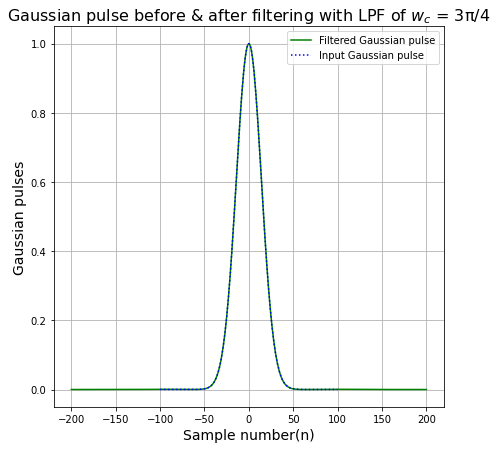

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(new_n,y3,color="green")
plt.plot(n,g,color="blue",linestyle="dotted")
plt.title("Gaussian pulse before & after filtering with LPF of $w_{c}$ = 3π/4",fontsize="16")
plt.xlabel("Sample number(n)",fontsize="14")
plt.ylabel("Gaussian pulses",fontsize="14")
plt.grid(True)
plt.legend(["Filtered Gaussian pulse","Input Gaussian pulse"])
plt.show()

In [ ]:
peak = -200 + np.where(y3== np.max(y3))[0][0]
print("Filtered Gaussian spectrum with cut-off frequency 3π/4 has a peak at n = {0}".format(peak))
print("Delay is by n = {} samples".format(peak))

Filtered Gaussian spectrum with cut-off frequency 3π/4 has a peak at n = 0
Delay is by n = 0 samples


Clearly , we can observe that both the input and filtered gaussian pulses with LPF of cut-off frequency $w_{c}$ = 3π/4 overlapped with each other and the peak of input and filtered gaussian pulses are at n=0 sample. So there is no delay in the filtered gaussian pulse.

####Observation of 7a),7b):
Clearly we can observe that, the filtered gaussian pulse with LPF of cut-off frequencies $w_{c}$ = π/2, π/4, 3π/4 overlapped with each other and there is no delay in the filtered gaussian pulse. This is because the LPF is centered at zero frequency and thus doesnot have any phase i.e. has zero phase. So it doesnot introduce any phase change in the input gaussian pulse  and hence there's no delay.

###(c) Transform the filter considered in part (a) to a high-pass filter by multiplying the coefficients by $(−1)^{n}$. Use this to filter the Gaussian pulse. What do you observe ?

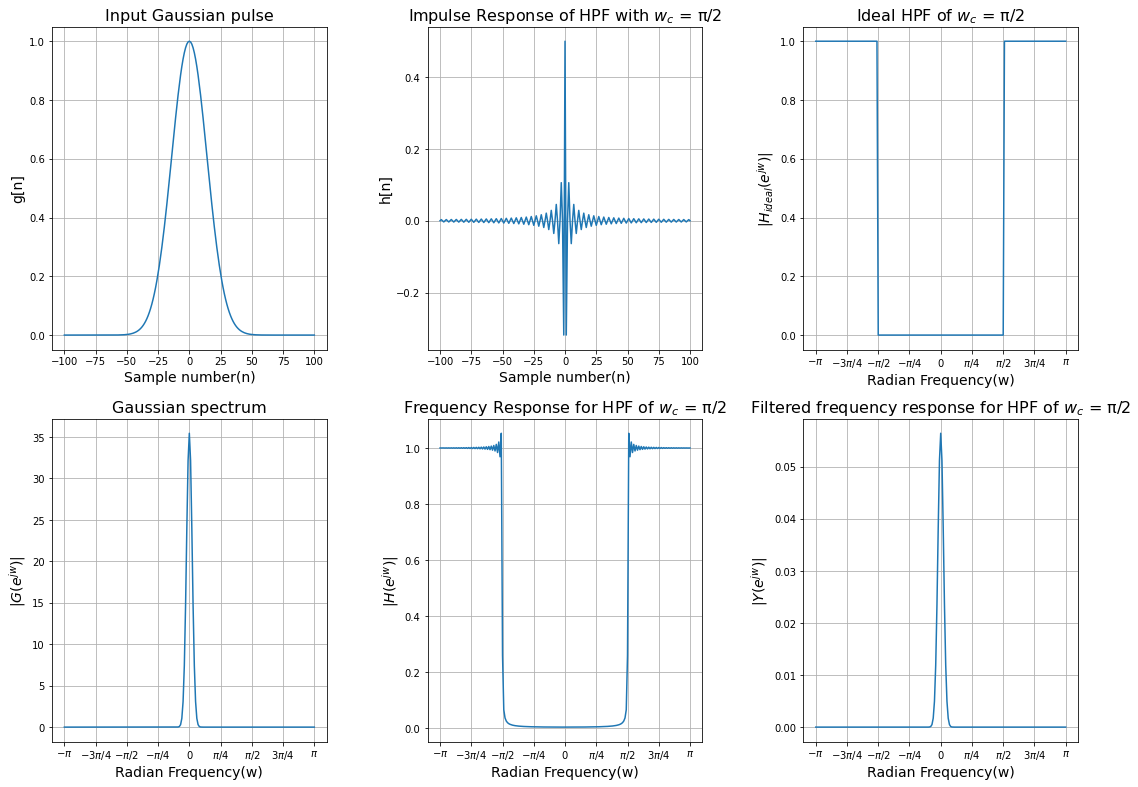

In [ ]:
# Time domain sequences 
h_new = [0]*len(n)
h_new = (np.power(-1,abs(n)))*h1  # ((-1)^n)h[n]
y_new = np.convolve(h_new,g)

# Frequency domain responses
H_new = fftshift(fft(h_new,NFFT)) # approximated high-pass filter
Y_new = fftshift(fft(y_new,NFFT))
H_ideal_HPF = 1- ideal_lpf(omega_c1,w) # ideal high-pass filter

figure = plt.figure(figsize=(16,12))

# Plotting the input Gaussian pulse in time domain
plt.subplot(2,3,1)
plt.plot(n,g)
plt.xlabel('Sample number(n)',fontsize="14")
plt.ylabel('g[n]',fontsize="14")
plt.title("Input Gaussian pulse",fontsize="16")
plt.grid(True)

# Plotting Impulse Response in time domain
plt.subplot(2,3,2)
plt.plot(n,h_new)
plt.xlabel('Sample number(n)',fontsize="14")
plt.ylabel('h[n]',fontsize="14")
plt.title("Impulse Response of HPF with $w_{c}$ = π/2",fontsize="16")
plt.grid(True)

# Plotting the Ideal High-pass filter in frequency domain
plt.subplot(2,3,3)
plt.plot(w,np.abs(H_ideal_HPF))
plt.xticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
           [r'$-\pi$', r'$-3\pi/4$', r'$-\pi/2$', r'$-\pi/4$', r'$0$', r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$', r'$\pi$'])
plt.xlabel('Radian Frequency(w)',fontsize="14")
plt.ylabel('|$H_{ideal}(e^{jw})$|',fontsize="14")
plt.title("Ideal HPF of $w_{c}$ = π/2",fontsize="16")
plt.grid(True)

# Plotting Gaussian spectrum in frequency domain
plt.subplot(2,3,4)
plt.plot(w,np.abs(G))
plt.xticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
           [r'$-\pi$', r'$-3\pi/4$', r'$-\pi/2$', r'$-\pi/4$', r'$0$', r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$', r'$\pi$'])
plt.xlabel('Radian Frequency(w)',fontsize="14")
plt.ylabel('|$G(e^{jw})$|',fontsize="14")
plt.title("Gaussian spectrum",fontsize="16")
plt.grid(True)

# Plotting Practical(truncated) High-Pass Filter in frequency domain
plt.subplot(2,3,5)
plt.plot(w, np.abs(H_new))
plt.xticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
           [r'$-\pi$', r'$-3\pi/4$', r'$-\pi/2$', r'$-\pi/4$', r'$0$', r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$', r'$\pi$'])

plt.xlabel('Radian Frequency(w)',fontsize="14")
plt.ylabel('|$H(e^{jw})$|',fontsize="14")
plt.title("Frequency Response for HPF of $w_{c}$ = π/2",fontsize="16")
plt.grid(True)

# Plotting the Filtered output response in frequency domain
plt.subplot(2,3,6)
plt.plot(w, np.abs(Y_new))
plt.xticks([-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
           [r'$-\pi$', r'$-3\pi/4$', r'$-\pi/2$', r'$-\pi/4$', r'$0$', r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$', r'$\pi$'])

plt.xlabel('Radian Frequency(w)',fontsize="14")
plt.ylabel('|$Y(e^{jw})$|',fontsize="14")
plt.title("Filtered frequency response for HPF of $w_{c}$ = π/2",fontsize="16")
plt.grid(True)

figure.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

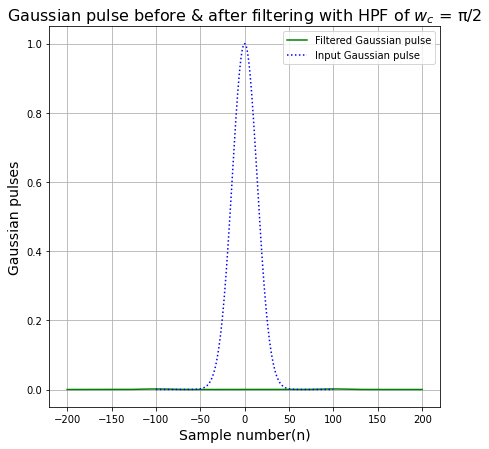

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(new_n,y_new,color="green")
plt.plot(n,g,color="blue",linestyle="dotted")
plt.title("Gaussian pulse before & after filtering with HPF of $w_{c}$ = π/2",fontsize="16")
plt.xlabel("Sample number(n)",fontsize="14")
plt.ylabel("Gaussian pulses",fontsize="14")
plt.grid(True)
plt.legend(["Filtered Gaussian pulse","Input Gaussian pulse"])
plt.show()

####Observation of 7c):
The filtered gaussian pulse is zero. Convolution in time domain is equivalent to multiplication in frequency domain according to convolution property. Since the input gaussian pulse has low frequency components around zero frequency, and the high-pass filter blocks the lower frequencies and allows the higher frequencies,  multiplication of both leads to zero response. So thus the gaussian pulse is completely filtered out by the high-pass filter.
